# <center>$\underline{\textbf{AAG05 - Regressão Linear}}$<p>
<center> Braulio Lucas - 5° Periodo - Sistemas de Informação <p>
<center> Christian Scoralich - 3° Periodo - Ciencias da Computação

## $\textbf{1. Importando Bibliotecas}$

In [85]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

## $\textbf{2. Preparando Amostra}$

## 2.1 Amostra bivariavel

<p>Foi escolhida uma amostra bivariavel que contém a altura e peso de mais de 5000 homens e mulheres.
<p>Vamos analisar se existe correlação entre peso e altura dos homens.

In [86]:
# Leitura do csv.
df=pd.read_csv("C:\\Users\\Braulio\\Documents\\Python Scripts\\weight-height.csv")
# Imprimir as 5 primeiras linhas do csv.
df.head()
# Armazeno as colunas em váriaveis
gender = df['Gender']
height = df['Height']
weight = df['Weight']
heightFemale = []
weightFemale = []
heightMale = []
weightMale = []
# separo a altura e peso de por gênero
for g,w,h in zip(gender,height,weight):
    if(g == 'Male'):
        heightMale.append(float(h))
        weightMale.append(float(w))
    if(g == 'Female'):
        heightFemale.append(float(h))
        weightFemale.append(float(w))

In [87]:
#coloco o peso e altura em uma matriz
heightMale.sort()
weightMale.sort()
xy = [heightMale,weightMale]

In [88]:
#analise de correlação
r = np.corrcoef(xy)
print(r)

[[1.         0.99964343]
 [0.99964343 1.        ]]


<p>Como r > 0 então a medida que x cresce, y também cresce. E como quase 1, se arredondar fica 1 podemos dizer que a correção é forte/perfeita. Portando podemos seguir para o passo 3.

## $\textbf{3. Testes visuais de Pressupostos}$

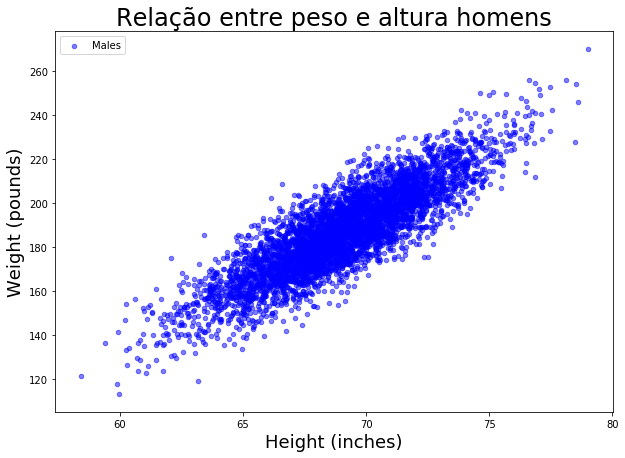

In [89]:
# teste visual de pressupostos

ax1= df[gender =='Male'].plot(kind='scatter', x='Height',y='Weight', color='blue',alpha=0.5, figsize=(10,7))
plt.legend(labels=['Males'])
plt.title('Relação entre peso e altura homens', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);
df_males = df[df['Gender']=='Male']

male_fit = np.polyfit(df_males.Height,df_males.Weight,1)
plt.show()

<p>Utilizando a biblioteca Seaborn pra gerar o plot

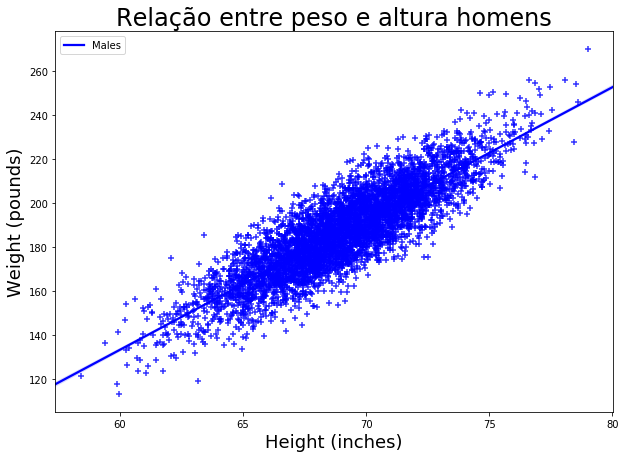

In [90]:
fig = plt.figure(figsize=(10,7))
sns.regplot(x=df_males.Height,y=df_males.Weight,color='blue', marker='+')

plt.legend(labels=['Males'])
plt.title('Relação entre peso e altura homens', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);
plt.show()

<p>Para melhorar a visualização serão selecionadas 300 amostras aleatoriamente

Text(0, 0.5, 'Weight (pounds)')

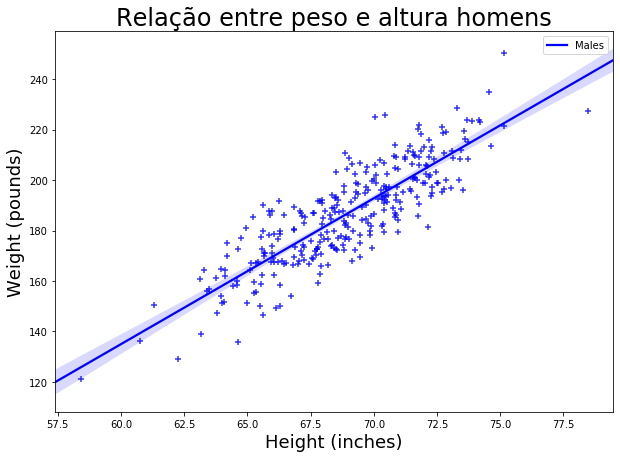

In [91]:
df_males_sample= df[df['Gender']=='Male'].sample(300)

fig = plt.figure(figsize=(10,7))
sns.regplot(x=df_males_sample.Height,y=df_males_sample.Weight,color='blue', marker='+')

plt.legend(labels=['Males'])
plt.title('Relação entre peso e altura homens', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)
plt.show()

## $\textbf{4. Intervalos de Confiança para a amostra acima de 90%-95%-99%}$

In [92]:
del df_males_sample['Gender']
print("Valores intervalo de Confiança")
#amostra1 90%
media = df_males_sample.values.mean()
desvio_padrao =  df_males_sample.values.std(ddof=1)                                     
conf_int = stats.norm.interval(0.90, loc=media, scale=desvio_padrao) 
print("90: ",conf_int)
#amostra1 95%
media = df_males_sample.values.mean()
desvio_padrao =  df_males_sample.values.std(ddof=1)                                              
conf_int = stats.norm.interval(0.95, loc=media, scale=desvio_padrao) 
print("95: ",conf_int)
#amostra1 99%
media = df_males_sample.values.mean()
desvio_padrao =  df_males_sample.values.std(ddof=1)                                            
conf_int = stats.norm.interval(0.99, loc=media, scale=desvio_padrao)
print("99: ",conf_int)



Valores intervalo de Confiança
90:  (28.14818464188218, 227.4266284802721)
95:  (9.059950689420077, 246.51486243273422)
99:  (-28.246919774664462, 283.82173289681873)


<p> Para intervalos 90 e 95 o valor 0 não está incluso, porém, para o intervalo 99 o valor 0 está incluso, concluindo que existe uma disparidade entre os valores de altura e peso comparados.

## $\textbf{5. Testes de linearidades, erros normais, homocedasticidade, teste T, teste Qui-Quadrado}$
O teste de linearidade mostra visualmente uma forte correlação. O teste de linearidade conclui que a amostra é linear

Como não há nenhuma tendência visível, então conclui-se que tem uma independência de erros

No teste de homocedasticidade há uma tendência de espalhamento

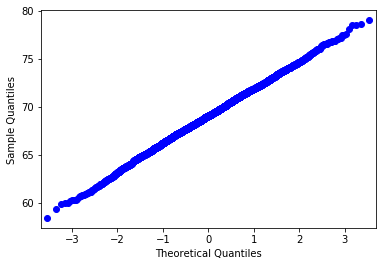

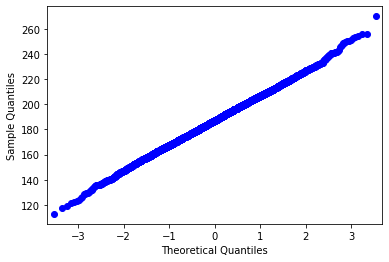

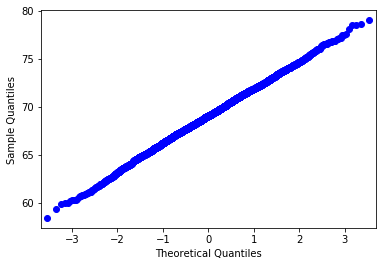

In [93]:
#erros normais
a = np.array(heightMale)
b = np.array(weightMale)
sm.qqplot(a)
sm.qqplot(b)
plt.show()

Os erros são normais já que os pontos plotados se aproximam da reta normal

In [94]:
#teste T
t, p = stats.ttest_ind(heightMale,weightMale)
print("t:",t,"\np", p)

t: 417.43743714646797 
p 0.0


<p> Dessa vez deu um t positivo, como o P = 0 então quer dizer que não existe chance alguma da diferença ser ao acaso

In [95]:
#teste Qui-quadrado
x2 = stats.chisquare(heightMale,weightMale)
print(x2)

Power_divergenceResult(statistic=1019032.8816493683, pvalue=0.0)


<p> Temos aqui uma significancia máxima